# Pymaceuticals Inc.
---

### Analysis

The analysis of the provided dataset reveals the followings:-

- Summary Statistics- shows that Ketapril has the highest (mean, median, variance, standard deviation and standard error) tumor volume, which implies Ketapril is not as effective as other drugs. Ramicane has the lowest statistics values for tumor volume of all the drug regimen,followed by Capomulin. 

- Bar Chart - reveals that Capomulin was tested on 230 mice, which makes it the most tested drug on the mice, followed by Ramicane (228 mice), and the least tested drug for treament is Propriva (148 mice).

- Pie chart - The chart shows that male mice (958, 51%) are more tested on than the female mice (922, 49%).

- IQR - Among the four drug regimen (Capomulin, Ramicane, Infubinol, and Ceftamin), Capomulin has the lowest inter quartile of 7.78, Capomulin and Ramicane have lower average tumor volume compared to Infubinol and Ceftamine which indicates Capomulin and Ramicane are more effective. The Infubinol as one outlier.

- Line plot - The line plot for Mouse "s185" treated with Capomulin shows that tumor volume vs timepoint is not a linear graph there are points where tumor volume increases slightly even after decreasing previously.

- Scatter plot - The graph shows there is correlation between average tumor volume and the mouse weight for mice treated with Capomulin.

- Correlation coefficient and line regression - reveals a positive correlation coefficeent (0.84) between average tumor volume and the mouse weight for mice treated with Capomulin.
 
 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combined_set= pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])


# Display the data table for preview
combined_set

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Look for missing value in combined data
combined_set.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [6]:
# Checking the number of mice.
mice_number = len(combined_set['Mouse ID'].unique())
mice_number

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicate= combined_set.loc[combined_set.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
mice_duplicate


array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
alldata_mice_duplicate= combined_set.loc[combined_set["Mouse ID"]=="g989", :]
alldata_mice_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
new_df = combined_set[combined_set['Mouse ID']!="g989"]
new_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Verify the number of mice in the clean DataFrame
mice_count =len(new_df["Mouse ID"].unique())
mice_count

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Using pandas
mean_TV = new_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_TV= new_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
var_TV = new_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_TV = new_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_TV = new_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary_statistics = pd.DataFrame({"Mean Turmor Volume":mean_TV, "Median Tumor Volume":median_TV, 
                                  "Tumor Volume Variance":var_TV, "Tumor Volume Std. Dev.":std_TV, 
                                  "Tumor Volume Std.Err.":sem_TV})
# Display the Summary statistics
summary_statistics


,Mean Turmor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_summary_statistics = new_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
agg_summary_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [13]:
#Get the number of all mice tested for each drug
drug_mice_count = new_df["Drug Regimen"].value_counts()
drug_mice_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

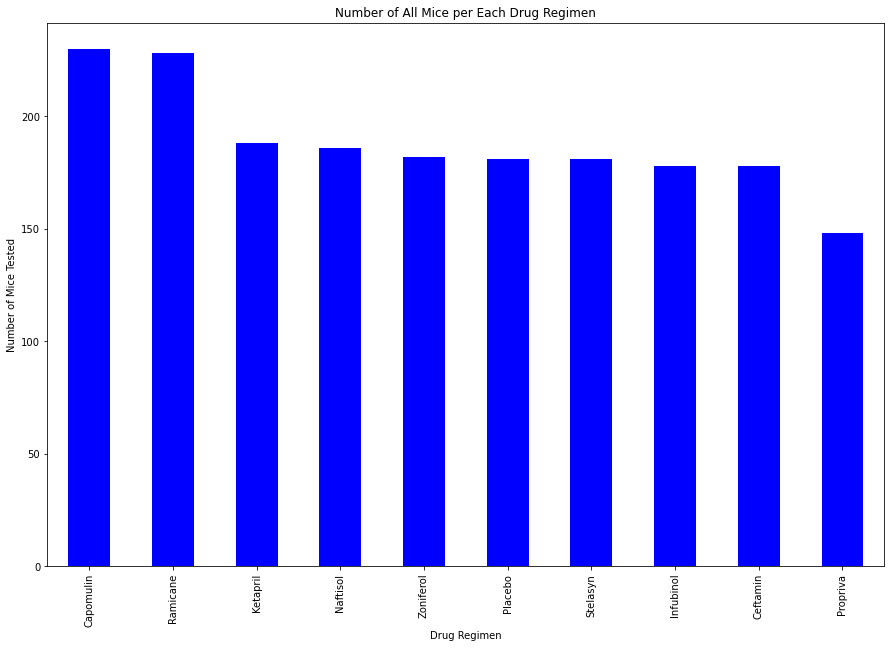

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a bar plot showing the total number of time points for all mice tested for each drug regimen using Pandas.
drug_mice_count = new_df["Drug Regimen"].value_counts()

plot_drug_mice_count = drug_mice_count.plot(kind='bar', color='b', figsize=(15,10))

# Set a title for the chart
plt.title("Number of All Mice per Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()
plt.tight_layout()

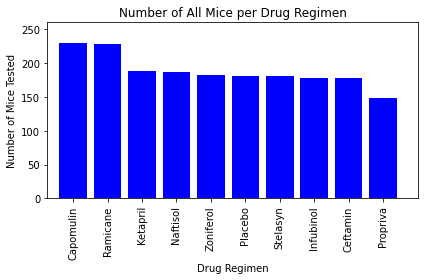

In [15]:
# Generate a bar plot showing the total number of time points for all mice tested for each drug regimen using pyplot.

# For x axis
drug_mice = new_df["Drug Regimen"].unique()
x_axis= np.arange(len(drug_mice))
tick_locations =[value for value in x_axis]
ticks = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn', 'Infubinol', 'Ceftamin', 'Propriva']

# For y axis                  
drug_mice_count = new_df["Drug Regimen"].value_counts()
y_axis = drug_mice_count                  
                  
plt.bar(x_axis, y_axis, color='blue', alpha=1.0, align="center")

# Set a title and label for the chart
plt.xticks(tick_locations, ticks, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xlim(-0.75, len(drug_mice),-0.25)
plt.ylim(0, max(drug_mice_count)+30)
plt.title("Number of All Mice per Drug Regimen")
plt.tight_layout()
plt.show()
          

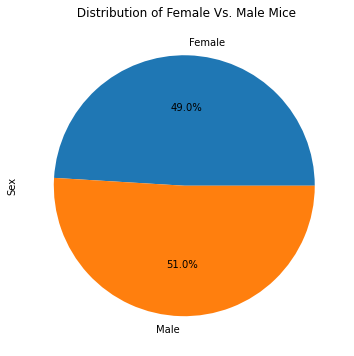

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# First group the data by sex
sex_df = new_df.groupby("Sex")

# Count the number of female and male mice
sex_count = sex_df["Sex"].count()

# plot pie graph
plt.title(" Distribution of Female Vs. Male Mice")
sex_graph = sex_count.plot(kind="pie", autopct="%1.1f%%", figsize=(6,6))


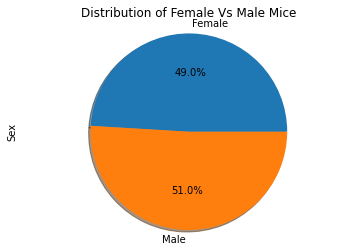

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# First create the labels for the pie section
sex = ["Female", "Male"]

# Recall count of female and male mice
size = [sex_count["Female"], sex_count["Male"]]

# Plot pie graph using pyplot
plt.pie(size, labels=sex, autopct= "%1.1f%%", shadow=True)
plt.axis("equal")
plt.ylabel("Sex")
plt.title("Distribution of Female Vs Male Mice")
plt.show()




## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
## First group data by " Mouse ID"
greatest_group = new_df.groupby('Mouse ID')

## Then find the greatest timepoint by finding the max
greatest_tp = greatest_group['Timepoint'].max()

## Create a DataFrame for the last timepoint
last_timepoint = pd.DataFrame(greatest_tp)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume = pd.merge(last_timepoint, new_df, on=["Mouse ID", "Timepoint"])
tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# use the for loop
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes to store in the variable
    new_tumor_vol = tumor_volume.loc[tumor_volume["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    
    # add result to the tumor_vol_list 
    tumor_vol_list.append(new_tumor_vol)
    
    # Calculate IQR
    quartiles= new_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq- lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5* iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = new_tumor_vol.loc[(new_tumor_vol < lower_bound) | (new_tumor_vol > upper_bound)]
    
    # Print results
    print(f"{drug} Regimen")
    print(f"The lower quartile of {drug} is :{round(lowerq,2)}")
    print(f"The upper quartile of {drug} is :{round(upperq,2)}")
    print(f"The inter quartile of {drug} is :{round(iqr,2)}")
    print(f"The average tumor volume(mm3) for {drug} is: {round(quartiles[0.5],2)}")
    print(f"Final tumor volume(mm3) for {drug} below {round(lower_bound,2)} could be outliers.")
    print(f"Final tumor volume(mm3) for {drug} below {round(upper_bound,2)} could be outliers.")
    print(f"The number of outliers for {drug} is: {outliers.count()}")
    print("-----------------------------------------------------------------")
   

Capomulin Regimen
The lower quartile of Capomulin is :32.38
The upper quartile of Capomulin is :40.16
The inter quartile of Capomulin is :7.78
The average tumor volume(mm3) for Capomulin is: 38.13
Final tumor volume(mm3) for Capomulin below 20.7 could be outliers.
Final tumor volume(mm3) for Capomulin below 51.83 could be outliers.
The number of outliers for Capomulin is: 0
-----------------------------------------------------------------
Ramicane Regimen
The lower quartile of Ramicane is :31.56
The upper quartile of Ramicane is :40.66
The inter quartile of Ramicane is :9.1
The average tumor volume(mm3) for Ramicane is: 36.56
Final tumor volume(mm3) for Ramicane below 17.91 could be outliers.
Final tumor volume(mm3) for Ramicane below 54.31 could be outliers.
The number of outliers for Ramicane is: 0
-----------------------------------------------------------------
Infubinol Regimen
The lower quartile of Infubinol is :54.05
The upper quartile of Infubinol is :65.53
The inter quartile o

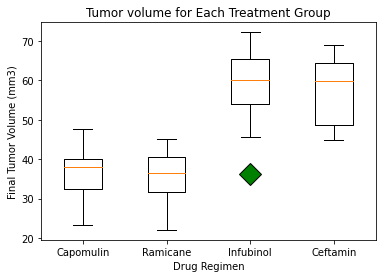

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, treatments_plot = plt.subplots()
treatments_plot.boxplot(tumor_vol_list, labels=treatments, flierprops={'marker':'D', 'markerfacecolor':'green', 'markersize':15})
treatments_plot.set_title("Tumor volume for Each Treatment Group")
treatments_plot.set_xlabel("Drug Regimen")
treatments_plot.set_ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

In [32]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

## First generate the data of mice treated with Capomulin
capomulin_data = new_df.loc[new_df["Drug Regimen"] == "Capomulin"]
capomulin_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


Text(0, 0.5, 'Tumor Volume (mm3)')

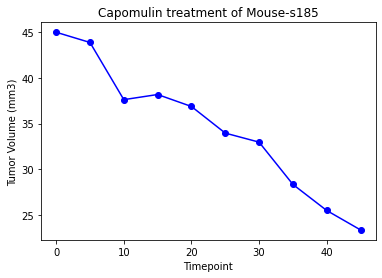

In [34]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

## Pickup unique ID number of any mouse treated with Capomulin
## To collect the data of the particular mouse, use loc

specific_mouse_df = capomulin_data.loc[capomulin_data["Mouse ID"] == "s185", :]
specific_mouse_df.head()

# Generate the line plot
fig, ax1 = plt.subplots()
x = specific_mouse_df["Timepoint"]
y = specific_mouse_df["Tumor Volume (mm3)"]

plt.plot(x, y, marker="o", color='b')
plt.title("Capomulin treatment of Mouse-s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")


Text(0, 0.5, 'Average Tumor Volume (mm3)')

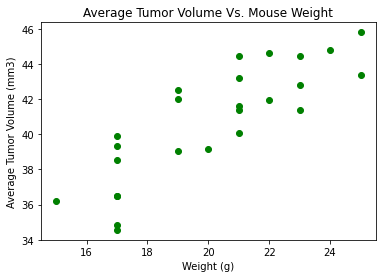

In [35]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Find the average  for th Capomulin regimen
cap_avg_tv = capomulin_data.groupby(["Mouse ID"]).mean()
cap_avg_tv

# plot the scatter graph

fig1, cap_avg_plot = plt.subplots()
cap_avg_plot.scatter(cap_avg_tv["Weight (g)"], cap_avg_tv["Tumor Volume (mm3)"], color='green')
plt.title("Average Tumor Volume Vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


## Correlation and Regression

In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

## Correlation coefficient between mouse weight and average tumor volume for Capomulin regimen
correlation = st.pearsonr(cap_avg_tv["Weight (g)"], cap_avg_tv["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")


The correlation between mouse weight and average tumor volume is 0.84


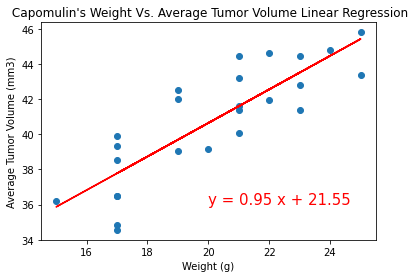

In [38]:
# Calulate linear regression model
cap_avg_tv = capomulin_data.groupby(["Mouse ID"]).mean()

# Set the axises
x_values = cap_avg_tv['Weight (g)']
y_values = cap_avg_tv['Tumor Volume (mm3)']

# Calculate line equation and the regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq = f"y = {round(slope,2)} x + {round(intercept, 2)}"

# plot scatter graph and the line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,36), fontsize=15, color="red")
plt.xlabel("Weight (g)")
plt.title(" Capomulin's Weight Vs. Average Tumor Volume Linear Regression")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()